In [76]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
# set pandas to display all columns
pd.set_option('display.max_columns', None)
# set seaborn style to white
sns.set_style('whitegrid')
# set seaborn palette to colorblind
sns.set_palette('colorblind')
# set seaborn font to sans-serif
sns.set(font='sans-serif')
# set seaborn font scale to 1.25
sns.set(font_scale=1.25)

In [77]:
# find the cvs file in data folder at the same
green_mobility = pd.read_csv('../data/raw/GM_preparedData.csv')
green_mobility.head(5)

,FromZoneID,ToZoneID,DriveLength,FreeTime,CongTime,CarGenCost,NoOfChange,WaitT,ZoneWaitT,ZoneConT,InVehicleT,PubDist,PubGenCost,OBJECTID,id,tripStart,tripEnd,vehicleId,startPositionLat,startPositionLng,endPositionLat,endPositionLng,birthday,key,id2,HH,Cars,Jobs,Sertype1,Sertype2,Sertype3,HourCost08_18,HourCost18_23,NightCost23_08,search12,search17,search22,HH_From,Cars_From,Jobs_From,SerType1_From,SerType2_From,SerType3_From,HourCost08_18_From,HourCost18_23_From,NightCost23_08_From,Search12_From,Search17_From,Search22_From,HH_To,Cars_To,Jobs_To,SerType1_To,SerType2_To,SerType3_To,HourCost08_18_To,HourCost18_23_To,NightCost23_08_To,Search12_To,Search17_To,Search22_To
0,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,88666.0,05JUL17:13:11:18,05JUL17:14:43:05,254.0,55.67551,12.58333,55.67555,12.58313,36.0,M,8403.0,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476
1,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,95281.0,10JUL17:08:43:57,10JUL17:08:49:17,206.0,55.67511,12.58435,55.67533,12.58326,22.0,M,10245.0,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476
2,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,103791.0,16JUL17:08:13:52,16JUL17:08:35:48,30.0,55.67554,12.58329,55.67537,12.58320,21.0,M,9674.0,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476
3,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,104956.0,17JUL17:01:17:30,17JUL17:01:19:22,194.0,55.67540,12.58367,55.67541,12.58369,20.0,F,12919.0,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476
4,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,132487.0,05AUG17:14:46:51,05AUG17:14:48:09,203.0,55.67312,12.57928,55.67292,12.57949,27.0,M,13898.0,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476,6.0,2.7,3159.16,1.383885,1.419849,0.207261,17.0,10.0,3.0,2.057987,1.236753,1.48476


In [105]:
green_mobility.tail(5)

,FromZoneID,ToZoneID,DriveLength,FreeTime,CongTime,CarGenCost,NoOfChange,WaitT,ZoneWaitT,ZoneConT,InVehicleT,PubDist,PubGenCost,OBJECTID,id,tripStart,tripEnd,vehicleId,startPositionLat,startPositionLng,endPositionLat,endPositionLng,birthday,key,id2,HH,Cars,Jobs,Sertype1,Sertype2,Sertype3,HourCost08_18,HourCost18_23,NightCost23_08,search12,search17,search22,HH_From,Cars_From,Jobs_From,SerType1_From,SerType2_From,SerType3_From,HourCost08_18_From,HourCost18_23_From,NightCost23_08_From,Search12_From,Search17_From,Search22_From,HH_To,Cars_To,Jobs_To,SerType1_To,SerType2_To,SerType3_To,HourCost08_18_To,HourCost18_23_To,NightCost23_08_To,Search12_To,Search17_To,Search22_To
169125,270220,270240,9.524355,9.270739,4.100934e-06,31.801980,0.0,0.0,12.704320,33.246918,8.000000,12.695596,29.368559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1727.0,1963.359687,889.992086,2.180620,24.215158,1.696892,NaN,NaN,NaN,NaN,NaN,NaN,1727.0,1963.359687,889.992086,2.180620,24.215158,1.696892,NaN,NaN,NaN,NaN,NaN,NaN,1727.0,1963.359687,889.992086,2.180620,24.215158,1.696892,NaN,NaN,NaN,NaN,NaN,NaN
169126,270230,270240,6.557479,7.540592,5.333275e-07,25.841448,0.0,0.0,7.872497,18.134037,6.180442,7.451716,18.357623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3802.0,3993.744221,4010.440000,0.782462,15.474284,0.669055,NaN,NaN,NaN,NaN,NaN,NaN,3802.0,3993.744221,4010.440000,0.782462,15.474284,0.669055,NaN,NaN,NaN,NaN,NaN,NaN,3802.0,3993.744221,4010.440000,0.782462,15.474284,0.669055,NaN,NaN,NaN,NaN,NaN,NaN
169127,270240,270240,5.007909,10.007909,0.000000e+00,0.000000,0.0,0.0,15.000000,3.000000,12.023726,4.207909,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2354.0,3134.360014,1270.820000,5.604091,17.550900,1.990914,NaN,NaN,NaN,NaN,NaN,NaN,2354.0,3134.360014,1270.820000,5.604091,17.550900,1.990914,NaN,NaN,NaN,NaN,NaN,NaN,2354.0,3134.360014,1270.820000,5.604091,17.550900,1.990914,NaN,NaN,NaN,NaN,NaN,NaN
169128,102220,350030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,163108.0,21AUG17:12:13:18,22AUG17:06:29:59,350.0,55.68414,12.58407,55.59504,11.85807,23.0,M,16113.0,2092.0,2031.526859,1612.370000,0.491465,28.986918,0.393700,17.0,10.0,3.0,8.357744,6.698997,8.294794,4500.0,1823.300608,25210.010000,1.422253,1.383479,0.089403,17.0,10.0,3.0,8.357744,6.698997,8.294794,2092.0,2031.526859,1612.370000,0.491465,28.986918,0.393700,17.0,10.0,3.0,8.357744,6.698997,8.294794
169129,185200,912140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,221445.0,18SEP17:08:06:34,18SEP17:08:29:31,246.0,55.63052,12.64885,55.73519,13.05054,24.0,M,12832.0,0.0,0.000000,8761.280000,0.134055,7.867816,0.153902,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,8761.280000,0.134055,7.867816,0.153902,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,8761.280000,0.134055,7.867816,0.153902,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# check how many uniqe id2 are there
green_mobility['Cars'].nunique()


258

In [99]:
# groupby id2 and count the nr of occurences
green_mobility.groupby('id2')['id2'].count().sort_values(ascending=False).head(10)

id2
11894.0    830
10627.0    656
4489.0     623
3709.0     582
12397.0    564
11969.0    543
12831.0    499
9685.0     492
14411.0    490
14412.0    489
Name: id2, dtype: int64

c:\ProgramData\anaconda3\envs\thesis\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

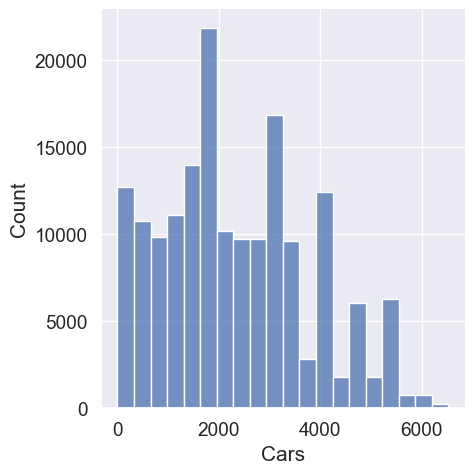

In [98]:
# plot Cars distribution
plt.figure(figsize=(10, 6))
sns.displot(green_mobility['Cars'], bins=20, kde=False)

In [78]:
# get a subset of green_mobility dataframe from column 'FromZoneID' to 'key' column

gm_raw = green_mobility.iloc[:, 0:24]
gm_raw.head()

,FromZoneID,ToZoneID,DriveLength,FreeTime,CongTime,CarGenCost,NoOfChange,WaitT,ZoneWaitT,ZoneConT,InVehicleT,PubDist,PubGenCost,OBJECTID,id,tripStart,tripEnd,vehicleId,startPositionLat,startPositionLng,endPositionLat,endPositionLng,birthday,key
0,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,88666.0,05JUL17:13:11:18,05JUL17:14:43:05,254.0,55.67551,12.58333,55.67555,12.58313,36.0,M
1,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,95281.0,10JUL17:08:43:57,10JUL17:08:49:17,206.0,55.67511,12.58435,55.67533,12.58326,22.0,M
2,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,103791.0,16JUL17:08:13:52,16JUL17:08:35:48,30.0,55.67554,12.58329,55.67537,12.58320,21.0,M
3,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,104956.0,17JUL17:01:17:30,17JUL17:01:19:22,194.0,55.67540,12.58367,55.67541,12.58369,20.0,F
4,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,132487.0,05AUG17:14:46:51,05AUG17:14:48:09,203.0,55.67312,12.57928,55.67292,12.57949,27.0,M


In [100]:
gm_raw.head()

,FromZoneID,ToZoneID,DriveLength,FreeTime,CongTime,CarGenCost,NoOfChange,WaitT,ZoneWaitT,ZoneConT,InVehicleT,PubDist,PubGenCost,OBJECTID,id,tripStart,tripEnd,vehicleId,startPositionLat,startPositionLng,endPositionLat,endPositionLng,birthday,sex
0,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,88666.0,2017-07-05 13:11:18,2017-07-05 14:43:05,254.0,55.67551,12.58333,55.67555,12.58313,36.0,M
1,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,95281.0,2017-07-10 08:43:57,2017-07-10 08:49:17,206.0,55.67511,12.58435,55.67533,12.58326,22.0,M
2,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,103791.0,2017-07-16 08:13:52,2017-07-16 08:35:48,30.0,55.67554,12.58329,55.67537,12.58320,21.0,M
3,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,104956.0,2017-07-17 01:17:30,2017-07-17 01:19:22,194.0,55.67540,12.58367,55.67541,12.58369,20.0,F
4,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,132487.0,2017-08-05 14:46:51,2017-08-05 14:48:09,203.0,55.67312,12.57928,55.67292,12.57949,27.0,M


In [106]:
gm_raw.tripStart.min()

Timestamp('2017-07-01 00:13:04')

<Axes: >

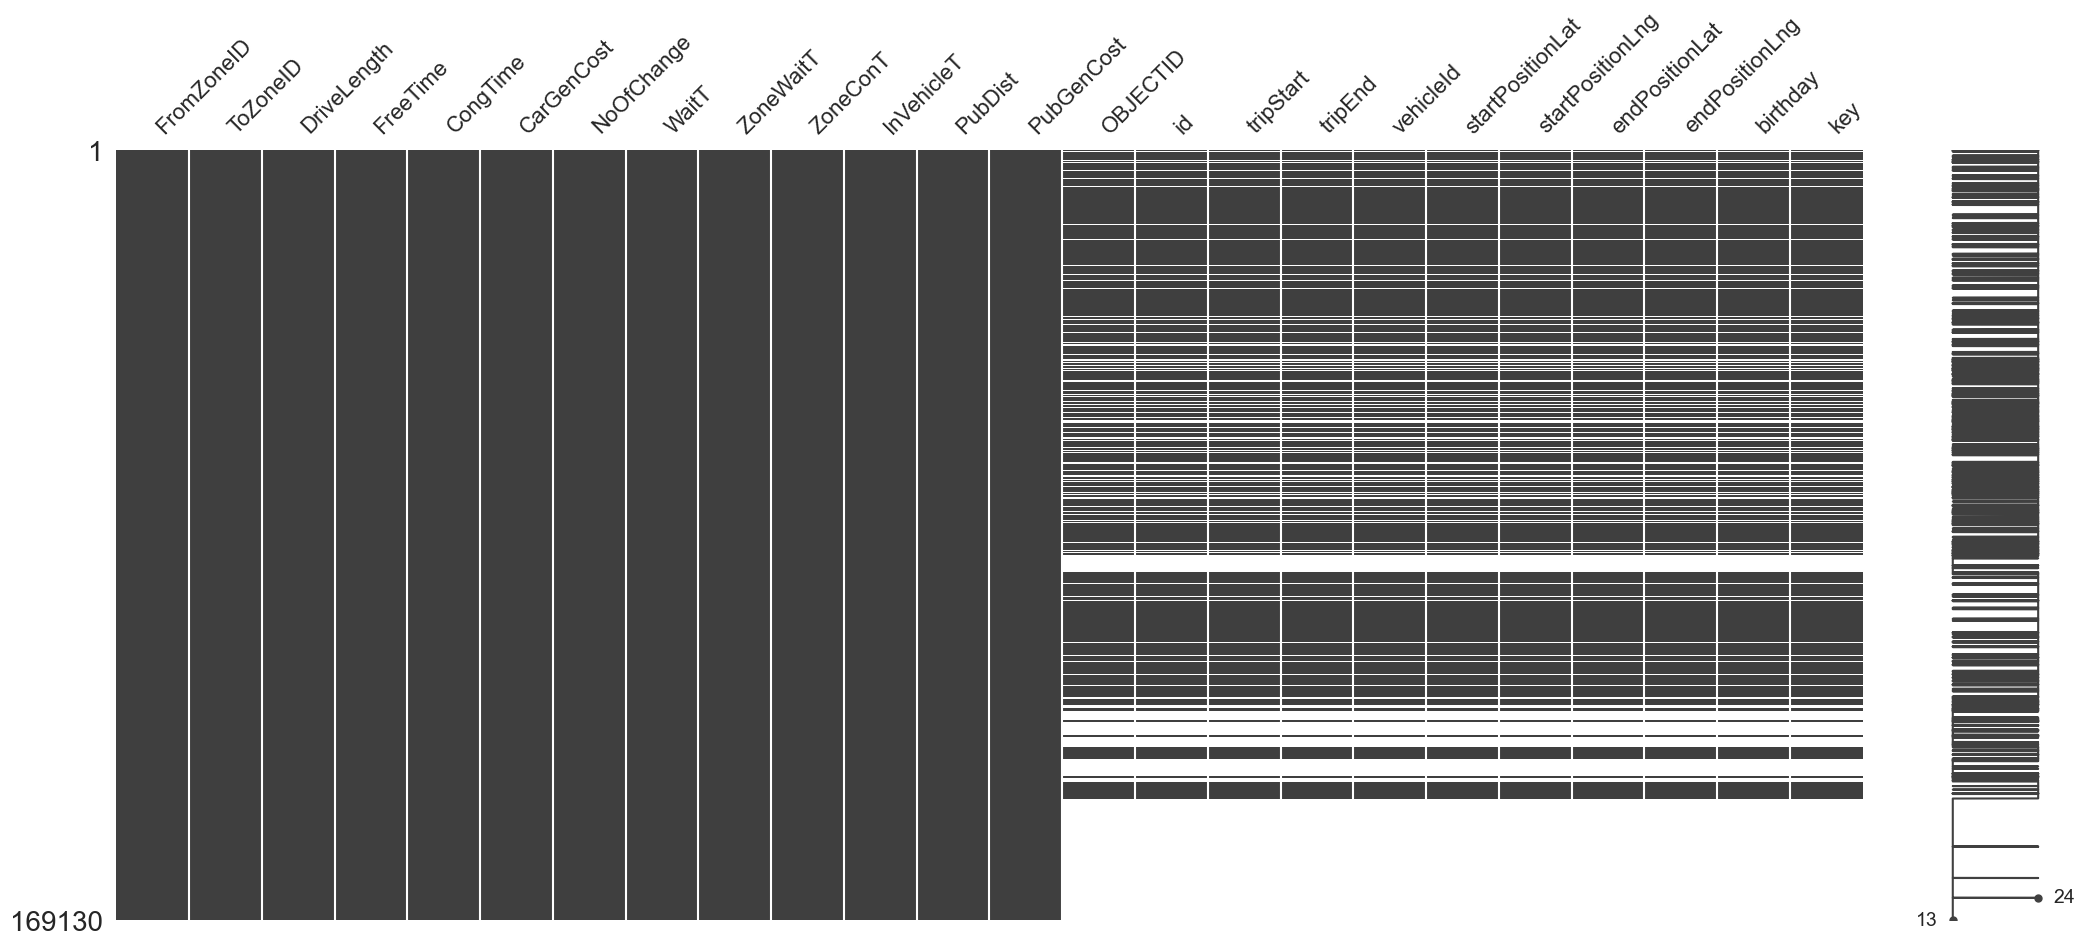

In [79]:
# check the missing values of gm_raw
msno.matrix(gm_raw)

In [80]:
# inspect the gm_raw dataframe
gm_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169130 entries, 0 to 169129
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FromZoneID        169130 non-null  int64  
 1   ToZoneID          169130 non-null  int64  
 2   DriveLength       169126 non-null  float64
 3   FreeTime          169126 non-null  float64
 4   CongTime          169126 non-null  float64
 5   CarGenCost        169126 non-null  float64
 6   NoOfChange        169126 non-null  float64
 7   WaitT             169126 non-null  float64
 8   ZoneWaitT         169126 non-null  float64
 9   ZoneConT          169126 non-null  float64
 10  InVehicleT        169126 non-null  float64
 11  PubDist           169126 non-null  float64
 12  PubGenCost        169126 non-null  float64
 13  OBJECTID          110444 non-null  float64
 14  id                110444 non-null  float64
 15  tripStart         110444 non-null  object 
 16  tripEnd           11

In [81]:
# drop the missing values in column DriveLength
gm_raw = gm_raw.dropna(subset=['DriveLength'])


In [82]:
# convert tripstart and tripend to datetime format
# current format is 05JUL17:13:11:18
# convert to 2017-07-05 13:11:18

gm_raw['tripStart'] = pd.to_datetime(gm_raw['tripStart'], format='%d%b%y:%H:%M:%S')
gm_raw['tripEnd'] = pd.to_datetime(gm_raw['tripEnd'], format='%d%b%y:%H:%M:%S')
gm_raw.info()



<class 'pandas.core.frame.DataFrame'>
Index: 169126 entries, 0 to 169127
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FromZoneID        169126 non-null  int64         
 1   ToZoneID          169126 non-null  int64         
 2   DriveLength       169126 non-null  float64       
 3   FreeTime          169126 non-null  float64       
 4   CongTime          169126 non-null  float64       
 5   CarGenCost        169126 non-null  float64       
 6   NoOfChange        169126 non-null  float64       
 7   WaitT             169126 non-null  float64       
 8   ZoneWaitT         169126 non-null  float64       
 9   ZoneConT          169126 non-null  float64       
 10  InVehicleT        169126 non-null  float64       
 11  PubDist           169126 non-null  float64       
 12  PubGenCost        169126 non-null  float64       
 13  OBJECTID          110440 non-null  float64       
 14  id       

In [83]:
gm_raw.head()

,FromZoneID,ToZoneID,DriveLength,FreeTime,CongTime,CarGenCost,NoOfChange,WaitT,ZoneWaitT,ZoneConT,InVehicleT,PubDist,PubGenCost,OBJECTID,id,tripStart,tripEnd,vehicleId,startPositionLat,startPositionLng,endPositionLat,endPositionLng,birthday,key
0,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,88666.0,2017-07-05 13:11:18,2017-07-05 14:43:05,254.0,55.67551,12.58333,55.67555,12.58313,36.0,M
1,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,95281.0,2017-07-10 08:43:57,2017-07-10 08:49:17,206.0,55.67511,12.58435,55.67533,12.58326,22.0,M
2,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,103791.0,2017-07-16 08:13:52,2017-07-16 08:35:48,30.0,55.67554,12.58329,55.67537,12.58320,21.0,M
3,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,104956.0,2017-07-17 01:17:30,2017-07-17 01:19:22,194.0,55.67540,12.58367,55.67541,12.58369,20.0,F
4,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,132487.0,2017-08-05 14:46:51,2017-08-05 14:48:09,203.0,55.67312,12.57928,55.67292,12.57949,27.0,M


In [84]:
# check CongTime column unique values
gm_raw['CongTime'].unique()

array([0.0000000e+00, 2.0522700e-05, 1.3966000e-05, ..., 9.8530352e-06,
       4.1009337e-06, 5.3332746e-07])

In [85]:
# check vehicleId column unique values
len(gm_raw['vehicleId'].unique())

396

c:\ProgramData\anaconda3\envs\thesis\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


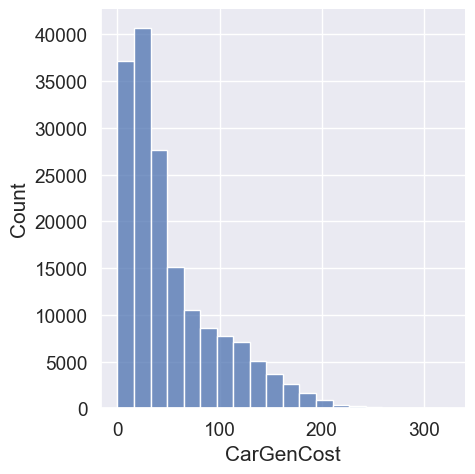

In [86]:
# plot the distribution of CongTime
sns.displot(gm_raw['CarGenCost'], kde=False, bins=20)

c:\ProgramData\anaconda3\envs\thesis\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


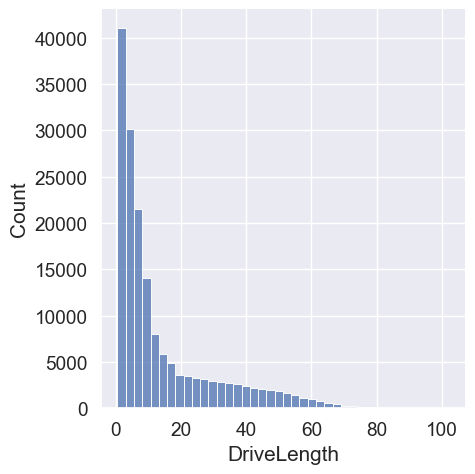

In [93]:
# plot distribution of DriveLength
sns.displot(gm_raw['DriveLength'], kde=False, bins=40)


c:\ProgramData\anaconda3\envs\thesis\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


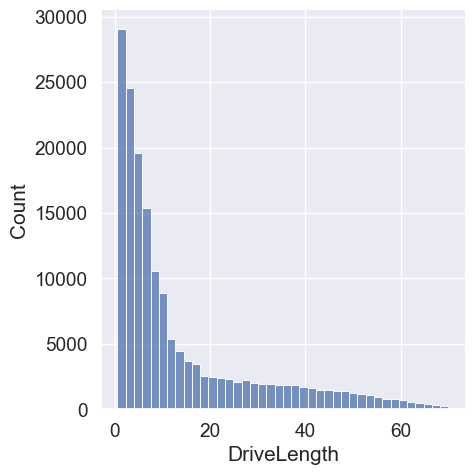

In [94]:
# fliter DriveLength < 70 and plot the distribution
sns.displot(gm_raw[gm_raw['DriveLength'] < 70]['DriveLength'], kde=False, bins=40)

In [87]:
# rename 'key' column to sex
# convert to categorical data type

gm_raw['sex'] = gm_raw['key'].astype('category')
gm_raw = gm_raw.drop('key', axis=1)
gm_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169126 entries, 0 to 169127
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FromZoneID        169126 non-null  int64         
 1   ToZoneID          169126 non-null  int64         
 2   DriveLength       169126 non-null  float64       
 3   FreeTime          169126 non-null  float64       
 4   CongTime          169126 non-null  float64       
 5   CarGenCost        169126 non-null  float64       
 6   NoOfChange        169126 non-null  float64       
 7   WaitT             169126 non-null  float64       
 8   ZoneWaitT         169126 non-null  float64       
 9   ZoneConT          169126 non-null  float64       
 10  InVehicleT        169126 non-null  float64       
 11  PubDist           169126 non-null  float64       
 12  PubGenCost        169126 non-null  float64       
 13  OBJECTID          110440 non-null  float64       
 14  id       

In [88]:
gm_raw.sex.value_counts()

sex
M    87967
F    20226
"     2247
Name: count, dtype: int64

In [89]:
# Replace anything other than 'M' and 'F' with np.nan in the 'sex' column
gm_raw['sex'] = gm_raw['sex'].apply(lambda x: x if x in ['M', 'F'] else np.nan)
# convert back to categorical data type
gm_raw['sex'] = gm_raw.sex.astype('category')

In [90]:
gm_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169126 entries, 0 to 169127
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FromZoneID        169126 non-null  int64         
 1   ToZoneID          169126 non-null  int64         
 2   DriveLength       169126 non-null  float64       
 3   FreeTime          169126 non-null  float64       
 4   CongTime          169126 non-null  float64       
 5   CarGenCost        169126 non-null  float64       
 6   NoOfChange        169126 non-null  float64       
 7   WaitT             169126 non-null  float64       
 8   ZoneWaitT         169126 non-null  float64       
 9   ZoneConT          169126 non-null  float64       
 10  InVehicleT        169126 non-null  float64       
 11  PubDist           169126 non-null  float64       
 12  PubGenCost        169126 non-null  float64       
 13  OBJECTID          110440 non-null  float64       
 14  id       

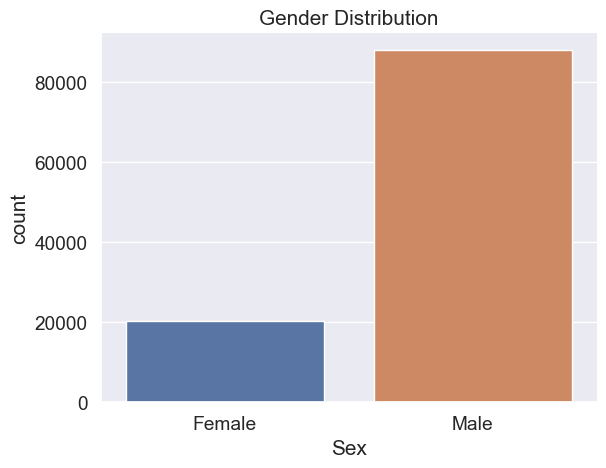

In [91]:
# plot a seaborn plot on counts of sex column
# as x labesl use Male and Female for M and L respectively

sns.countplot(data = gm_raw, x = 'sex')
# set title to "Gender Distribution"
plt.title("Gender Distribution")
plt.xlabel("Sex")
plt.xticks(ticks=[1, 0], labels=['Male', 'Female'])

sns.despine()
plt.show()


In [95]:
# save the gm_raw dataframe to csv file in data folder
gm_raw.to_csv('../data/processed/gm_raw.csv', index=False)